#House Predction

In [ ]:
pip install pyforest

In [ ]:
pip install lazypredict

# New Section

## load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
train=pd.DataFrame(pd.read_csv('train.csv'))

In [ ]:
# train=train.drop('Id',axis=1)

In [ ]:
train = train.append(test, ignore_index=True)

In [ ]:
train

In [ ]:
y=train['SalePrice']
train=train.drop('SalePrice',axis=1)

In [ ]:
df_categorical = train.select_dtypes(include='object')
df_numerical =train.select_dtypes(exclude='object')

## Data exploration

In [ ]:
# from scipy import stats
# from scipy.stats import norm, skew

# sns.distplot(train['SalePrice'] , fit=norm);

# (mu, sigma) = norm.fit(train['SalePrice'])
# print(f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')
# plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'],loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# fig = plt.figure()
# res = stats.probplot(train['SalePrice'], plot=plt)
# plt.show()

In [ ]:
# train.info()

In [ ]:
# print(len(df_categorical.columns))
# print(len(df_numerical.columns))

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# pd.set_option('display.max_columns', None)
# df_categorical.describe()

In [ ]:
# df_numerical.describe()

In [ ]:
# df = df_numerical.melt(var_name='cols',  value_name='vals')

# sns.displot(kind='kde', data=df, col='cols', col_wrap=4, x='vals', hue="cols", facet_kws={'sharey': False, 'sharex': False})

## Data engineer

### Missing data

In [ ]:
df_numerical.isna().sum()

In [ ]:
# df_numerical['LotFrontage'] = df_numerical['LotFrontage'].fillna(df_numerical.groupby('1stFlrSF')['LotFrontage'].transform('mean'))
# df_numerical['LotFrontage'].interpolate(method='linear',inplace=True)
# df_numerical['LotFrontage']=df_numerical['LotFrontage'].astype(int)
df_numerical['GarageYrBlt'].fillna(0,inplace=True)
df_numerical['MasVnrArea'].fillna(0,inplace=True)

In [ ]:
iid=df_numerical['Id']

In [ ]:
df_numerical.drop('Id',axis=1,inplace=True)

In [ ]:
# df_numerical['GarageYrBlt'].fillna(0,inplace=True)  #GarageYrBlt,MasVnrArea
# df_numerical['MasVnrArea'].fillna(0,inplace=True)
columnss =df_numerical.columns
imputer = KNNImputer(n_neighbors=50)                               # LotFrontage
df_numerical=imputer.fit_transform(df_numerical)
df_numerical=pd.DataFrame(df_numerical)
df_numerical.columns=columnss
df_numerical.isna().sum()

In [ ]:
df_numerical['SalePrice']=y
df_numerical['Id']=iid


In [ ]:
# df_numerical=imputer.transform(df_numerical)

In [ ]:
df_categorical.isna().sum()

MSZoning            0
Street              0
Alley            1097
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           32
BsmtCond           32
BsmtExposure       32
BsmtFinType1       32
BsmtFinType2       33
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       546
GarageType         69
GarageFinish       69
GarageQual         69
GarageCond         69
PavedDrive          0
PoolQC           1163
Fence             942
MiscFeature      1124
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
df_categorical.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_categorical.fillna('None',inplace=True)

In [ ]:
# df_categorical['Electrical'].fillna(df_categorical['Electrical'].mode()[0],inplace=True)
# df_categorical.fillna('None',inplace=True)# BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,Alley
# df_categorical.isna().sum()

### Convert data type

#### New Section

In [ ]:
# fig, axes = plt.subplots(round(len(df_categorical.columns) / 3), 3, figsize=(12, 30))

# for i, ax in enumerate(fig.axes):
#     if i < len(df_categorical.columns):
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#         sns.countplot(x=df_categorical.columns[i], alpha=0.7, data=df_categorical, ax=ax)

# fig.tight_layout()
# After making some plots we found that we have some colums with low variance so we decide to delete them

In [ ]:
# df_categorical.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition1',
#  'Condition2','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating',
#  'Functional','GarageQual','GarageCond', 'PavedDrive', 'PoolQC','MiscFeature','SaleType'],axis=1,inplace=True)


In [ ]:
df_numerical['YrBltRmd']=df_numerical['YearBuilt']+df_numerical['YearRemodAdd']
df_numerical['Total_Square_Feet'] = (df_numerical['BsmtFinSF1'] + df_numerical['BsmtFinSF2'] + df_numerical['1stFlrSF'] + df_numerical['2ndFlrSF'] + df_numerical['TotalBsmtSF'])
df_numerical['Total_Bath'] = (df_numerical['FullBath'] + (0.5 * df_numerical['HalfBath']) + df_numerical['BsmtFullBath'] + (0.5 * df_numerical['BsmtHalfBath']))
df_numerical['Total_Porch_Area'] = (df_numerical['OpenPorchSF'] + df_numerical['3SsnPorch'] + df_numerical['EnclosedPorch'] + df_numerical['ScreenPorch'] + df_numerical['WoodDeckSF'])
df_numerical['exists_pool'] = df_numerical['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_numerical['exists_garage'] = df_numerical['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_numerical['exists_fireplace'] = df_numerical['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_numerical['exists_bsmt'] = df_numerical['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_numerical['old_house'] = df_numerical['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

In [ ]:
# df_numerical.drop(['YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','TotalBsmtSF',
#                    'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch',
#                    'ScreenPorch','WoodDeckSF','PoolArea','GarageArea','Fireplaces'],axis=1,inplace=True)

In [ ]:
# !pip install category_encoders

In [ ]:
from category_encoders.target_encoder import TargetEncoder
for col in df_categorical.columns:
    te=TargetEncoder()
    df_categorical[col]=te.fit_transform(df_categorical[col],y)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# cols = df_categorical.columns

# for c in cols:
#     lbl = LabelEncoder()
#     lbl.fit(list(df_categorical[c].values))
#     df_categorical[c] = lbl.transform(list(df_categorical[c].values))

In [ ]:
new_train_data=df_numerical.join(df_categorical)

In [ ]:
iid=new_train_data['Id']

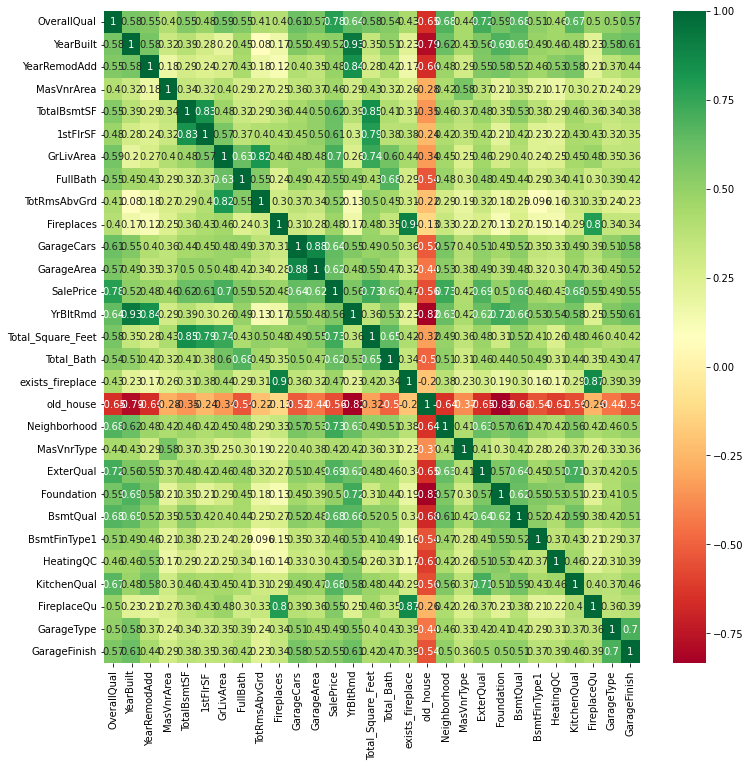

In [ ]:
corrmat = new_train_data.corr()
top_corr_features_c = corrmat.index[abs(corrmat["SalePrice"])>0.4]
plt.figure(figsize=(12,12))
g = sns.heatmap(new_train_data[top_corr_features_c].corr(),annot=True,cmap="RdYlGn")

In [ ]:
new_train_data=new_train_data[top_corr_features_c]

In [ ]:
top_corr_features_c=list(top_corr_features_c)
top_corr_features_c.remove('SalePrice')

In [ ]:
new_train_data=new_train_data.join(iid)

In [ ]:
new_train_data.isna().sum()

In [ ]:
test=new_train_data[new_train_data['Id'].isnull()==True]
train=new_train_data[new_train_data['Id'].isnull()==False]

In [ ]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

#### Ordinal encoder

In [ ]:
# for col in ord_fe:
#     print('-' * 40 + col + '-' * 40 , end=' - ')
#     display(df_categorical[col].value_counts())

In [ ]:
for i in ["ExterQual", "ExterCond", "HeatingQC","KitchenQual"]:
  oe =OrdinalEncoder(categories=[["Po", "Fa", "TA", "Gd" ,"Ex"]])
  df_categorical[i]=oe.fit_transform(np.array(df_categorical[i]).reshape(-1, 1))
# **************************************************************************************************
for i in ["BsmtQual", "BsmtCond", "FireplaceQu","GarageCond", "GarageQual"]:
  oe =OrdinalEncoder(categories=[["None", "Po", "Fa", "TA", "Gd","Ex"]])
  df_categorical[i]=oe.fit_transform(np.array(df_categorical[i]).reshape(-1, 1))
# **************************************************************************************************
for i in ["BsmtFinType1", "BsmtFinType2"]:
  oe =OrdinalEncoder(categories=[["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ","GLQ"]])
  df_categorical[i]=oe.fit_transform(np.array(df_categorical[i]).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["IR3", "IR2", "IR1","Reg"]])
df_categorical['LotShape']=oe.fit_transform(np.array(df_categorical['LotShape']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['Twnhs','TwnhsE','Duplex','2fmCon','1Fam']])
df_categorical['BldgType']=oe.fit_transform(np.array(df_categorical['BldgType']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["None", "No", "Mn", "Av","Gd"]])
df_categorical['BsmtExposure']=oe.fit_transform(np.array(df_categorical['BsmtExposure']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1","Typ"]])
df_categorical['Functional']=oe.fit_transform(np.array(df_categorical['Functional']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']])
df_categorical['Electrical']=oe.fit_transform(np.array(df_categorical['Electrical']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['Gtl', 'Mod', "Sev"]])
df_categorical['LandSlope']=oe.fit_transform(np.array(df_categorical['LandSlope']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['None','Unf','RFn','Fin']])
df_categorical['GarageFinish']=oe.fit_transform(np.array(df_categorical['GarageFinish']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["None", "MnWw", "GdWo", "MnPrv","GdPrv"]])
df_categorical['Fence']=oe.fit_transform(np.array(df_categorical['Fence']).reshape(-1, 1))

#### One hot encoder

In [ ]:
# df_categorical.drop(['Neighborhood','RoofStyle','SaleCondition','MSZoning','LotConfig','MasVnrType',
# 'GarageType','Exterior1st','Exterior2nd','Neighborhood','RoofStyle','SaleCondition','MSZoning','LotConfig','MasVnrType','Exterior1st','Exterior2nd'],axis=1,inplace=True)

In [ ]:
df_categorical["HasMasVnrType"] = np.where(df_categorical.MasVnrType == "None", 0, 1)
df_categorical["BoughtOffPlan"] = np.where(df_categorical.SaleCondition == "Partial", 1, 0)

In [ ]:
df_categorical.drop(["Street", "Utilities", "PoolQC", "MiscFeature", "Heating", "Condition2"],axis=1,inplace=True)

In [ ]:
df_categorical["Condition1"] = np.where(df_categorical.Condition1.isin(["Artery", "Feedr"]), "Road", df_categorical.Condition1)
df_categorical["Condition1"] = np.where(df_categorical.Condition1.isin(["RRAe", "RRAn", "RRNe", "RRNn"]), "RR", df_categorical.Condition1)
df_categorical["Condition1"] = np.where(df_categorical.Condition1.isin(["PosA", "PosN"]), "Pos", df_categorical.Condition1)

In [ ]:
df_categorical["SaleType"] = np.where(df_categorical.SaleType.isin(["Oth", "ConLI",'Con','CWD','ConLw','ConLD']), "other", df_categorical.SaleType)
df_categorical["SaleCondition"] = np.where(df_categorical.SaleCondition.isin(["AdjLand", "Alloca"]), "other", df_categorical.SaleCondition)
df_categorical["RoofStyle"] = np.where(df_categorical.RoofStyle.isin(["Shed", "Mansard",'Flat','Gambrel']), "other", df_categorical.RoofStyle)
df_categorical["RoofMatl"] = np.where(df_categorical.RoofMatl.isin(["WdShake", "Metal",'Membran','WdShngl','Tar&Grv']), "other", df_categorical.RoofMatl)
df_categorical["HouseStyle"] = np.where(df_categorical.HouseStyle.isin(["2.5Fin", "2.5Unf",'1.5Unf','SFoyer']), "other", df_categorical.HouseStyle)
df_numerical["MSSubClass"] = np.where(df_numerical.MSSubClass.isin([40.0, 180.0,45.0,75.0]), "other", df_numerical.MSSubClass)

In [ ]:
ohe=OneHotEncoder()
enc_data=pd.DataFrame(ohe.fit_transform(df_categorical[['MSZoning','LandContour','LotConfig','Condition1','HouseStyle',
                                                        'RoofStyle','RoofMatl','MasVnrType','CentralAir','GarageType',
                                                        'PavedDrive','SaleType','SaleCondition','Exterior1st','Exterior2nd','Neighborhood']]).toarray())

In [ ]:
enc_data.columns = ohe.get_feature_names()
df_categorical=df_categorical.join(enc_data)
df_categorical.drop(['MSZoning','Alley','LandContour','LotConfig','Condition1','HouseStyle','RoofStyle',
                     'RoofMatl','MasVnrType','CentralAir','GarageType','PavedDrive','SaleType',
                     'SaleCondition','Exterior1st','Exterior2nd','Neighborhood'],axis=1,inplace=True)

In [ ]:
df_categorical['SalePrice']=y

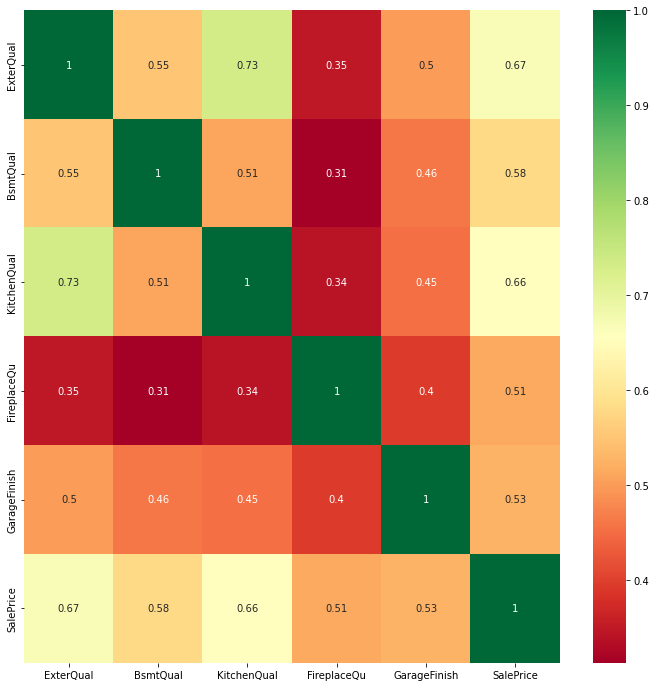

In [ ]:
corrmat = df_categorical.corr()
top_corr_features_c = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(12,12))
g = sns.heatmap(df_categorical[top_corr_features_c].corr(),annot=True,cmap="RdYlGn")

In [ ]:
top_corr_features_c=list(top_corr_features_c)
top_corr_features_c.remove('SalePrice')

In [ ]:
df_categorical=df_categorical[top_corr_features_c]

### numeric

In [ ]:
df_numerical["TOTALBATH"] = df_numerical.FullBath + df_numerical.HalfBath*0.5
df_numerical["FullArea"] = df_numerical["LotFrontage"] + df_numerical["LotArea"]
df_numerical['YearsSinceRemodel'] = df_numerical['YrSold'].astype(int) - df_numerical['YearRemodAdd'].astype(int)
df_numerical["NEW_1st*GrLiv"] = df_numerical["1stFlrSF"] * df_numerical["GrLivArea"]
df_numerical["NEW_Garage*GrLiv"] = (df_numerical["GarageArea"] * df_numerical["GrLivArea"])

df_numerical['Total_Home_Quality'] = df_numerical['OverallQual'] * df_numerical['OverallCond']
df_numerical['TotalSF'] = df_numerical['TotalBsmtSF'] + df_numerical['1stFlrSF'] + df_numerical['2ndFlrSF']

# df_numerical['YrBltAndRemod'] = df_numerical['YearBuilt'] + df_numerical['YearRemodAdd']

df_numerical['Total_sqr_footage'] = (df_numerical['BsmtFinSF1'] + df_numerical['BsmtFinSF2'] +
                                 df_numerical['1stFlrSF'] + df_numerical['2ndFlrSF'])
df_numerical['Total_porch_sf'] = (df_numerical['OpenPorchSF'] + df_numerical['3SsnPorch'] +
                              df_numerical['EnclosedPorch'] + df_numerical['ScreenPorch'] +
                              df_numerical['WoodDeckSF'])

df_numerical["NEW_LotRatio"] = df_numerical.GrLivArea / df_numerical.LotArea
df_numerical["NEW_RatioArea"] = df_numerical.TotalSF / df_numerical.LotArea
df_numerical["NEW_MasVnrRatio"] = df_numerical.MasVnrArea / df_numerical.TotalSF

In [ ]:
df_numerical.index=y.index

In [ ]:
df_numerical=df_numerical.join(y)

In [ ]:
df_numerical.corr("spearman").SalePrice.sort_values(ascending = False)[1:]

In [ ]:
corrmat = df_numerical.corr()
top_corr_features_n = corrmat.index[abs(corrmat["SalePrice"])>0.3]
plt.figure(figsize=(12,12))
g = sns.heatmap(df_numerical[top_corr_features_n].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df_numerical=df_numerical[top_corr_features_n]

In [ ]:
top_corr_features_n=list(top_corr_features_n)
top_corr_features_n.remove('SalePrice')

In [ ]:
df_numerical.index=list(df_categorical.index)

In [ ]:
data_after=df_numerical.join(df_categorical)

In [ ]:
data_after

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,TOTALBATH,YearsSinceRemodel,NEW_1st*GrLiv,NEW_Garage*GrLiv,Total_Home_Quality,TotalSF,Total_sqr_footage,Total_porch_sf,SalePrice,ExterQual,BsmtQual,KitchenQual,FireplaceQu,GarageFinish
0,78.00,7.00,2005.00,2005.00,0.00,1300.00,1734.00,1734.00,1734.00,2.00,7.00,0.00,2.00,660.00,24.00,2.00,1,3006756.00,1144440.00,35.00,3468.00,3034.00,184.00,260000,3.00,4.00,3.00,0.00,3.00
1,89.84,6.00,1976.00,1976.00,120.00,712.00,796.00,790.00,1574.00,2.00,6.00,1.00,2.00,566.00,111.00,2.50,30,1243460.00,890884.00,30.00,2370.00,2286.00,417.00,190000,2.00,4.00,2.00,3.00,3.00
2,104.00,9.00,2008.00,2009.00,860.00,0.00,1926.00,1966.00,3140.00,3.00,11.00,2.00,3.00,820.00,78.00,3.50,0,6173240.00,2574800.00,45.00,5066.00,3140.00,222.00,485000,4.00,5.00,4.00,4.00,3.00
3,30.70,7.00,2000.00,2000.00,0.00,641.00,673.00,673.00,1382.00,2.00,6.00,0.00,2.00,490.00,50.00,2.50,6,930086.00,677180.00,35.00,2055.00,2023.00,203.00,165000,3.00,4.00,3.00,0.00,1.00
4,34.00,7.00,2007.00,2008.00,166.00,904.00,1314.00,1314.00,1314.00,2.00,6.00,1.00,2.00,626.00,62.00,2.00,1,1726596.00,822564.00,35.00,2628.00,2218.00,234.00,230000,3.00,4.00,3.00,4.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,65.00,6.00,1992.00,1992.00,0.00,387.00,761.00,810.00,1603.00,2.00,7.00,0.00,2.00,484.00,124.00,2.50,14,1298430.00,775852.00,30.00,2364.00,1990.00,124.00,175900,3.00,4.00,3.00,0.00,2.00
930,70.00,5.00,2007.00,2007.00,0.00,206.00,1120.00,1120.00,1120.00,1.00,6.00,0.00,0.00,0.00,30.00,1.00,0,1254400.00,0.00,25.00,2240.00,1326.00,30.00,147000,2.00,4.00,2.00,0.00,0.00
931,74.00,9.00,2004.00,2005.00,216.00,1170.00,1462.00,1462.00,2224.00,2.00,10.00,1.00,3.00,738.00,0.00,2.50,4,3251488.00,1641312.00,45.00,3686.00,3394.00,184.00,350000,3.00,5.00,4.00,4.00,3.00
932,89.00,9.00,2007.00,2008.00,70.00,1022.00,1620.00,1620.00,1620.00,2.00,6.00,1.00,3.00,912.00,0.00,2.00,1,2624400.00,1477440.00,45.00,3240.00,2642.00,228.00,315500,3.00,5.00,4.00,5.00,3.00


In [ ]:
# from sklearn.preprocessing import StandardScaler
# s_scaler = StandardScaler()
# columns=df_numerical.columns
# df_numerical=s_scaler.fit_transform(df_numerical)
# df_numerical=pd.DataFrame(df_numerical,columns=columns)
# df_numerical

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# n_scaler = MinMaxScaler()
# columns=df_numerical.columns
# df_numerical = n_scaler.fit_transform(df_numerical)
# df_numerical=pd.DataFrame(df_numerical,columns=columns)

## feat selction

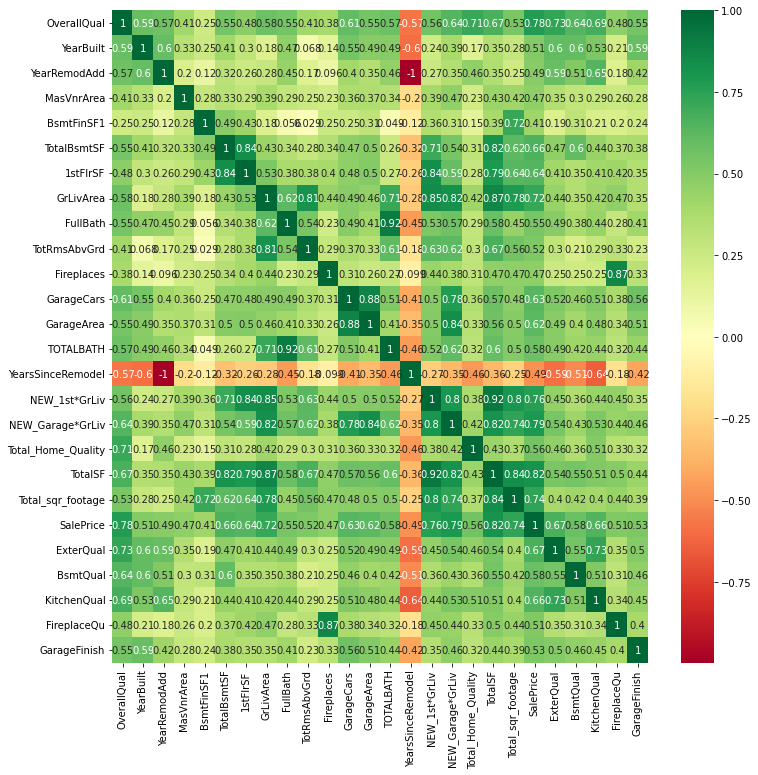

In [ ]:
corrmat = data_after.corr()
top_corr_features_all = corrmat.index[abs(corrmat["SalePrice"])>0.4]
plt.figure(figsize=(12,12))
g = sns.heatmap(data_after[top_corr_features_all].corr(),annot=True,cmap="RdYlGn")

In [ ]:
new_train_data=data_after[top_corr_features_all]

In [ ]:
top_corr_features_all=list(top_corr_features_all)
top_corr_features_all.remove('SalePrice')

# New Section

## train test sblit

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_train_data.drop("SalePrice",axis=1), new_train_data['SalePrice'], test_size=0.30, random_state=42)

## Extra

In [ ]:
# individual_features_df = []
# for i in range(0, len(df_numerical.columns) - 1): # -1 because the last column is SalePrice
#     tmpDf = df_numerical[[df_numerical.columns[i], 'SalePrice']]
#     tmpDf = tmpDf[tmpDf[df_numerical.columns[i]] != 0]
#     individual_features_df.append(tmpDf)
# # اذا كانت الصفر مش بالبيانات

In [ ]:
# from operator import itemgetter
# all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
# all_correlations = sorted(all_correlations.items(), key=itemgetter(1))
# all_correlations
# new corr fet لازم نوخذه بعين الاعتبار

## module

### New Section

In [ ]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(train.drop("SalePrice",axis=1), test.drop("SalePrice",axis=1), train['SalePrice'], test['SalePrice'])
models

 98%|█████████▊| 41/42 [00:54<00:01,  1.51s/it]

[05:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:54<00:00,  1.30s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.88,0.89,25581.10,0.18
GradientBoostingRegressor,0.87,0.89,25965.81,0.38
ExtraTreesRegressor,0.85,0.87,27681.57,0.60
BaggingRegressor,0.82,0.84,31051.97,0.11
RandomForestRegressor,0.81,0.83,31372.90,0.93
HistGradientBoostingRegressor,0.78,0.80,34145.06,0.48
LGBMRegressor,0.77,0.79,34987.95,0.20
KNeighborsRegressor,0.74,0.77,37239.56,0.02
AdaBoostRegressor,0.73,0.77,37382.13,0.20


## module

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rm=RandomForestRegressor()
rm.fit(train.drop("SalePrice",axis=1),train['SalePrice'])
scores = cross_val_score(rm,train.drop("SalePrice",axis=1),train['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

30715.37620008313


In [ ]:
scores = cross_val_score(rm,test.drop("SalePrice",axis=1),test['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

32538.56530429543


### laso

In [ ]:
from sklearn.linear_model import LassoLarsCV
la=LassoLarsCV()
la.fit(train.drop("SalePrice",axis=1),train['SalePrice'])
scores = cross_val_score(la,train.drop("SalePrice",axis=1),train['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

32617.645262482634


In [ ]:
scores = cross_val_score(la,test.drop("SalePrice",axis=1),test['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

40392.0917745999


### Xgboost

In [ ]:
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(train.drop("SalePrice",axis=1),train['SalePrice'])
scores = cross_val_score(reg,train.drop("SalePrice",axis=1),train['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

[05:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
scores = cross_val_score(reg,test.drop("SalePrice",axis=1),test['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(train.drop("SalePrice",axis=1),train['SalePrice'])
scores = cross_val_score(reg,train.drop("SalePrice",axis=1),train['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

29546.519900567684


In [ ]:
scores = cross_val_score(reg,test.drop("SalePrice",axis=1),test['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

33348.51548269677


## fine_tune

In [ ]:
params = {'min_child_weight':[4,5], 'gamma':[.2,.4],  'subsample':[.4,.7],
'colsample_bytree':[.2,.7],'n_estimators' : [800,1000,1200],'learning_rate': [ 0.001,.01 ,0.1], 'max_depth': [3,4], 'reg_lambda':[.3,.7], 'reg_alpha':[.3,.7]}

In [ ]:
from sklearn.model_selection import GridSearchCV


GBR=XGBRegressor()
grid_GBR = GridSearchCV(GBR,params, cv = 2, n_jobs=-1)
grid_GBR.fit(new_train_data.drop("SalePrice",axis=1), new_train_data['SalePrice'])

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

[03:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(colsample_bytree=0.2, gamma=0.2, learning_rate=0.01, max_depth=4,
             min_child_weight=5, n_estimators=800, reg_alpha=0.3,
             reg_lambda=0.7, subsample=0.4)

 The best score across ALL searched params:
 0.8503652555591461

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.2, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 800, 'reg_alpha': 0.3, 'reg_lambda': 0.7, 'subsample': 0.4}


In [ ]:
reg=XGBRegressor(colsample_bytree=0.2, gamma= 0.2, learning_rate= 0.01,max_depth= 4, min_child_weight= 5, n_estimators= 800, reg_alpha= .3, reg_lambda= .7, subsample= .4,enable_categorical=True)
reg.fit(train.drop("SalePrice",axis=1),train['SalePrice'])
scores = cross_val_score(reg,train.drop("SalePrice",axis=1),train['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

[05:04:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
scores = cross_val_score(reg,test.drop("SalePrice",axis=1),test['SalePrice'], cv=10 , scoring='neg_mean_squared_error',)
RF_model_rmse = np.sqrt(-scores)
print(RF_model_rmse.mean())

[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# late_pred=reg.predict(test)

In [ ]:
pred=reg.predict(test.drop("SalePrice",axis=1))

## subm

### test preses

In [ ]:
test=pd.DataFrame(pd.read_csv('test.csv'))
id_test=test['Id']
# test.drop('Id',axis=1,inplace=True)

In [ ]:
df_categorical = test.select_dtypes(include='object')
df_numerical =test.select_dtypes(exclude='object')

In [ ]:
# df_numerical['GarageYrBlt'].fillna(0,inplace=True)
# df_numerical['MasVnrArea'].fillna(0,inplace=True)
columnss =df_numerical.columns
df_numerical=imputer.transform(df_numerical)
df_numerical=pd.DataFrame(df_numerical)
df_numerical.columns=columnss

In [ ]:
df_categorical['Electrical'].fillna(df_categorical['Electrical'].mode()[0],inplace=True)
df_categorical.fillna('None',inplace=True)

In [ ]:
for i in ["ExterQual", "ExterCond", "HeatingQC","KitchenQual"]:
  oe =OrdinalEncoder(categories=[["Po", "Fa", "TA", "Gd" ,"Ex"]])
  df_categorical[i]=oe.fit_transform(np.array(df_categorical[i]).reshape(-1, 1))
# **************************************************************************************************
for i in ["BsmtQual", "BsmtCond", "FireplaceQu","GarageCond", "GarageQual"]:
  oe =OrdinalEncoder(categories=[["None", "Po", "Fa", "TA", "Gd","Ex"]])
  df_categorical[i]=oe.fit_transform(np.array(df_categorical[i]).reshape(-1, 1))
# **************************************************************************************************
for i in ["BsmtFinType1", "BsmtFinType2"]:
  oe =OrdinalEncoder(categories=[["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ","GLQ"]])
  df_categorical[i]=oe.fit_transform(np.array(df_categorical[i]).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["IR3", "IR2", "IR1","Reg"]])
df_categorical['LotShape']=oe.fit_transform(np.array(df_categorical['LotShape']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['Twnhs','TwnhsE','Duplex','2fmCon','1Fam']])
df_categorical['BldgType']=oe.fit_transform(np.array(df_categorical['BldgType']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["None", "No", "Mn", "Av","Gd"]])
df_categorical['BsmtExposure']=oe.fit_transform(np.array(df_categorical['BsmtExposure']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1","Typ"]])
df_categorical['Functional']=oe.fit_transform(np.array(df_categorical['Functional']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']])
df_categorical['Electrical']=oe.fit_transform(np.array(df_categorical['Electrical']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['Gtl', 'Mod', "Sev"]])
df_categorical['LandSlope']=oe.fit_transform(np.array(df_categorical['LandSlope']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['None','Unf','RFn','Fin']])
df_categorical['GarageFinish']=oe.fit_transform(np.array(df_categorical['GarageFinish']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[["None", "MnWw", "GdWo", "MnPrv","GdPrv"]])
df_categorical['Fence']=oe.fit_transform(np.array(df_categorical['Fence']).reshape(-1, 1))
# **************************************************************************************************
oe =OrdinalEncoder(categories=[['Wood',"Stone", "Slab", "BrkTil", "CBlock","PConc"]])
df_categorical['Foundation']=oe.fit_transform(np.array(df_categorical['Foundation']).reshape(-1, 1))

In [ ]:
df_categorical["HasMasVnrType"] = np.where(df_categorical.MasVnrType == "None", 0, 1)
df_categorical["BoughtOffPlan"] = np.where(df_categorical.SaleCondition == "Partial", 1, 0)
df_categorical.drop(["Street", "Utilities", "PoolQC", "MiscFeature", "Heating", "Condition2"],axis=1,inplace=True)
df_categorical["Condition1"] = np.where(df_categorical.Condition1.isin(["Artery", "Feedr"]), "Road", df_categorical.Condition1)
df_categorical["Condition1"] = np.where(df_categorical.Condition1.isin(["RRAe", "RRAn", "RRNe", "RRNn"]), "RR", df_categorical.Condition1)
df_categorical["Condition1"] = np.where(df_categorical.Condition1.isin(["PosA", "PosN"]), "Pos", df_categorical.Condition1)
df_categorical["SaleType"] = np.where(df_categorical.SaleType.isin(["Oth", "ConLI",'Con','CWD','ConLw','ConLD']), "other", df_categorical.SaleType)
df_categorical["SaleCondition"] = np.where(df_categorical.SaleCondition.isin(["AdjLand", "Alloca"]), "other", df_categorical.SaleCondition)
df_categorical["RoofStyle"] = np.where(df_categorical.RoofStyle.isin(["Shed", "Mansard",'Flat','Gambrel']), "other", df_categorical.RoofStyle)
df_categorical["RoofMatl"] = np.where(df_categorical.RoofMatl.isin(["WdShake", "Metal",'Membran','WdShngl','Tar&Grv']), "other", df_categorical.RoofMatl)
df_categorical["HouseStyle"] = np.where(df_categorical.HouseStyle.isin(["2.5Fin", "2.5Unf",'1.5Unf','SFoyer']), "other", df_categorical.HouseStyle)
df_numerical["MSSubClass"] = np.where(df_numerical.MSSubClass.isin([40.0, 180.0,45.0,75.0]), "other", df_numerical.MSSubClass)
enc_data=pd.DataFrame(ohe.fit_transform(df_categorical[['MSZoning','LandContour','LotConfig','Condition1','HouseStyle',
                                                        'RoofStyle','RoofMatl','MasVnrType','CentralAir','GarageType',
                                                        'PavedDrive','SaleType','SaleCondition','Exterior1st','Exterior2nd','Neighborhood']]).toarray())
enc_data.columns = ohe.get_feature_names()
df_categorical=df_categorical.join(enc_data)
df_categorical.drop(['MSZoning','Alley','LandContour','LotConfig','Condition1','HouseStyle','RoofStyle',
                     'RoofMatl','MasVnrType','CentralAir','GarageType','PavedDrive','SaleType',
                     'SaleCondition','Exterior1st','Exterior2nd','Neighborhood'],axis=1,inplace=True)

In [ ]:
df_categorical=df_categorical[top_corr_features_c]

In [ ]:
df_numerical["TOTALBATH"] = df_numerical.FullBath + df_numerical.HalfBath*0.5
df_numerical["FullArea"] = df_numerical["LotFrontage"] + df_numerical["LotArea"]
df_numerical['YearsSinceRemodel'] = df_numerical['YrSold'].astype(int) - df_numerical['YearRemodAdd'].astype(int)
df_numerical["NEW_1st*GrLiv"] = df_numerical["1stFlrSF"] * df_numerical["GrLivArea"]
df_numerical["NEW_Garage*GrLiv"] = (df_numerical["GarageArea"] * df_numerical["GrLivArea"])

df_numerical['Total_Home_Quality'] = df_numerical['OverallQual'] * df_numerical['OverallCond']
df_numerical['TotalSF'] = df_numerical['TotalBsmtSF'] + df_numerical['1stFlrSF'] + df_numerical['2ndFlrSF']

# df_numerical['YrBltAndRemod'] = df_numerical['YearBuilt'] + df_numerical['YearRemodAdd']

df_numerical['Total_sqr_footage'] = (df_numerical['BsmtFinSF1'] + df_numerical['BsmtFinSF2'] +
                                 df_numerical['1stFlrSF'] + df_numerical['2ndFlrSF'])
df_numerical['Total_porch_sf'] = (df_numerical['OpenPorchSF'] + df_numerical['3SsnPorch'] +
                              df_numerical['EnclosedPorch'] + df_numerical['ScreenPorch'] +
                              df_numerical['WoodDeckSF'])

df_numerical["NEW_LotRatio"] = df_numerical.GrLivArea / df_numerical.LotArea
df_numerical["NEW_RatioArea"] = df_numerical.TotalSF / df_numerical.LotArea
df_numerical["NEW_MasVnrRatio"] = df_numerical.MasVnrArea / df_numerical.TotalSF
df_numerical=df_numerical[top_corr_features_n]

In [ ]:
df_numerical.index=list(df_categorical.index)

In [ ]:
data_after=df_numerical.join(df_categorical)

In [ ]:
new_test_data=data_after[top_corr_features_all]

### dwonloed modle

In [ ]:
final_pred = pd.DataFrame()
final_pred["Id"] = id_test
pred= pd.Series(pred)
final_pred["SalePrice"] = late_pred

In [ ]:
final_pred.to_csv('ll.csv', index=False)